In [1]:
# === Import library ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv("diamonds.csv")

print("Preview data:")
print(data.head())

print("\nInfo kolom:")
print(data.info())

print("\nStatistik deskriptif:")
print(data.describe(include='all'))


Preview data:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

Info kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  flo

In [2]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
data = data.drop(columns=['Unnamed: 0'], axis=1)
display(data)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
data_encoded = pd.get_dummies(
    data,
    columns=["cut", "color", "clarity"],
    drop_first=True
)

print("Kolom setelah encoding:")
print(data_encoded.columns)


Kolom setelah encoding:
Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')


In [5]:
data_encoded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,False,True,False,...,False,False,False,False,False,True,False,False,False,False
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [6]:
data_encoded.replace({True: 1, False:0}, inplace=True)
data_encoded

C:\Users\ACER\AppData\Local\Temp\ipykernel_13872\4294226264.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded.replace({True: 1, False:0}, inplace=True)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape)


Ukuran data latih: (43154, 23)
Ukuran data uji  : (10789, 23)


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Contoh prediksi vs aktual:")
for i in range(5):
    print(f"Prediksi: {round(y_pred[i],2)}  |  Aktual: {y_test.iloc[i]}")


Contoh prediksi vs aktual:
Prediksi: 705.83  |  Aktual: 559
Prediksi: 8101.88  |  Aktual: 8403
Prediksi: 311.12  |  Aktual: 1238
Prediksi: 654.34  |  Aktual: 1243
Prediksi: 9861.53  |  Aktual: 6901


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("R²   :", r2)
print("MAE  :", mae)
print("RMSE :", rmse)


R²   : 0.9221982562588074
MAE  : 731.5479381456985
RMSE : 1102.1476745082157


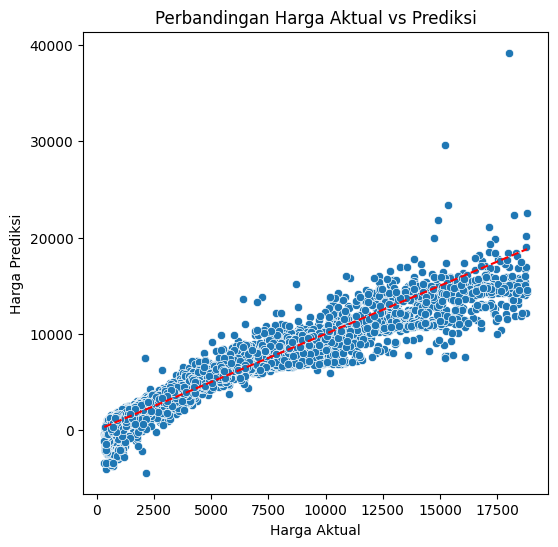

In [10]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Perbandingan Harga Aktual vs Prediksi")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

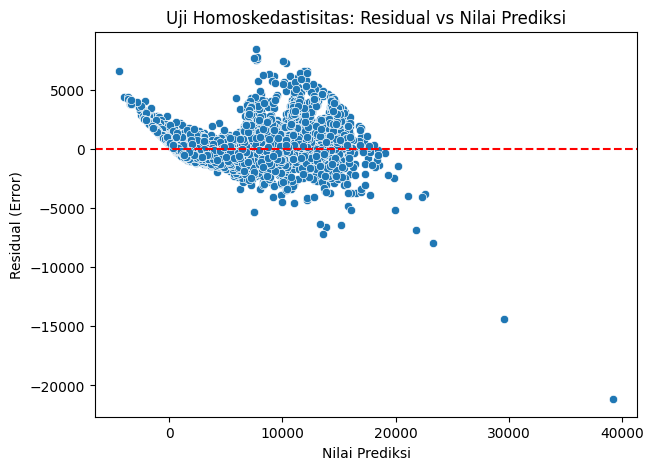

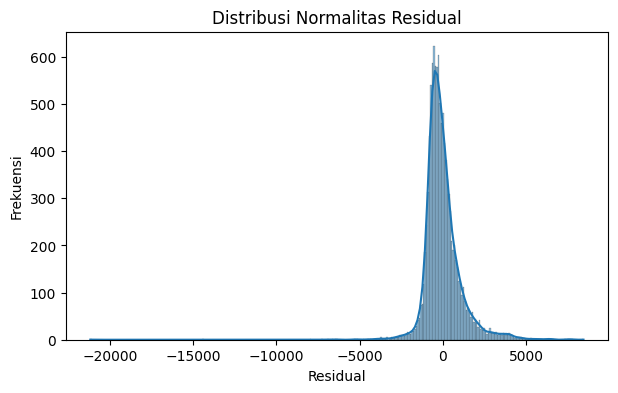

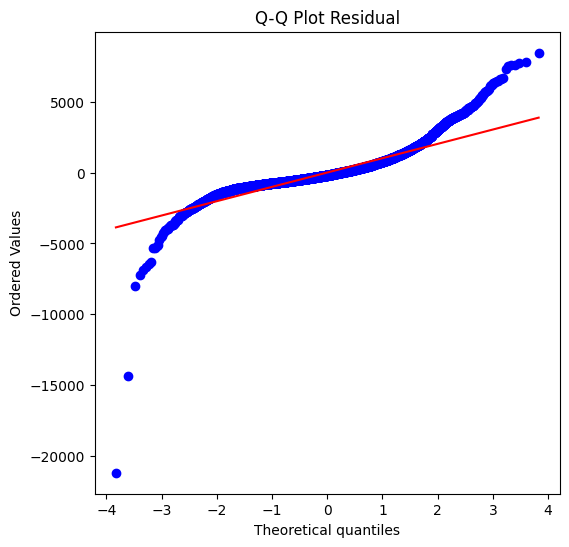

In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual (Error)")
plt.title("Uji Homoskedastisitas: Residual vs Nilai Prediksi")
plt.show()

# 1. Histogram + KDE (distribusi residual)
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribusi Normalitas Residual")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

# 2. Q-Q Plot (Quantile-Quantile)
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot Residual")
plt.show()

=== Matriks Korelasi ===
          carat     depth     table     price         x         y         z
carat  1.000000  0.028234  0.181602  0.921591  0.975093  0.951721  0.953387
depth  0.028234  1.000000 -0.295798 -0.010630 -0.025289 -0.029340  0.094927
table  0.181602 -0.295798  1.000000  0.127118  0.195333  0.183750  0.150915
price  0.921591 -0.010630  0.127118  1.000000  0.884433  0.865419  0.861249
x      0.975093 -0.025289  0.195333  0.884433  1.000000  0.974701  0.970771
y      0.951721 -0.029340  0.183750  0.865419  0.974701  1.000000  0.952005
z      0.953387  0.094927  0.150915  0.861249  0.970771  0.952005  1.000000


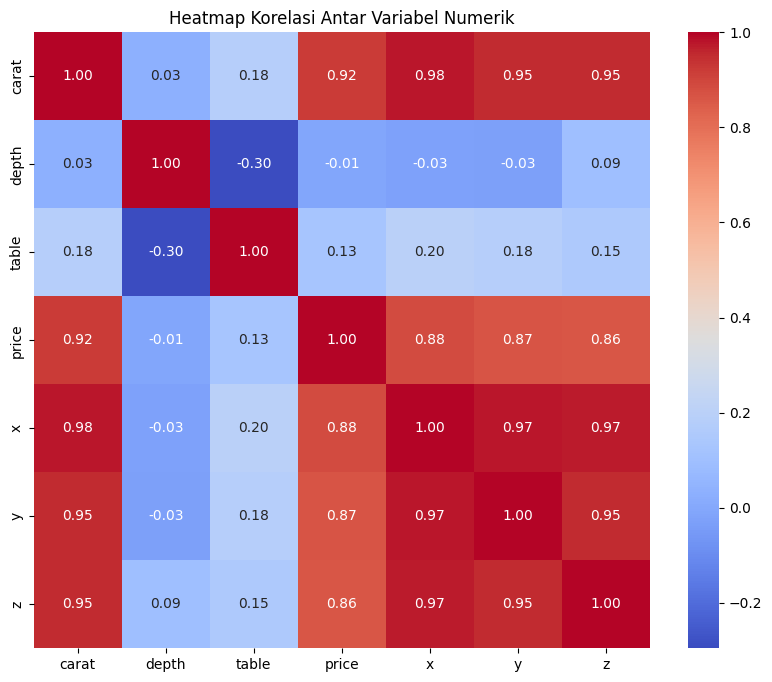

In [12]:
# Ambil hanya kolom numerik
numeric_cols = data.select_dtypes(include=["int64", "float64"])

# Hitung matriks korelasi
corr_matrix = numeric_cols.corr()

# Tampilkan tabel korelasi
print("=== Matriks Korelasi ===")
print(corr_matrix)

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [13]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)


          Feature   Coefficient
0           carat  11223.461263
16     clarity_IF   5500.732679
21   clarity_VVS1   5130.608750
22   clarity_VVS2   5082.358244
19    clarity_VS1   4702.939625
20    clarity_VS2   4395.407603
17    clarity_SI1   3783.469959
18    clarity_SI2   2826.469425
7       cut_Ideal    819.258521
8     cut_Premium    745.058626
9   cut_Very Good    719.773793
6        cut_Good    577.415842
4               y     10.531886
2           table    -25.836219
1           depth    -58.411288
5               z   -156.326496
10        color_E   -215.055155
11        color_F   -279.557854
12        color_G   -489.351676
3               x   -931.499627
13        color_H  -1002.187240
14        color_I  -1472.912132
15        color_J  -2376.793656


In [14]:
# Contoh data baru (ganti dengan data aktual Anda)
new_data = pd.DataFrame({
    'carat': [2.29],
    'depth': [60.8],
    'table': [60.0],
    'x': [8.5],
    'y': [8.47],
    'z': [5.16],
    'cut_Good': [0],
    'cut_Ideal': [0],
    'cut_Premium':[1],
    'cut_Very Good':[0],
    'color_E':[0],
    'color_F':[0],
    'color_G':[0],
    'color_H':[0],
    'color_I':[1],
    'color_J':[0],
    'clarity_IF':[0],
    'clarity_SI1':[0],
    'clarity_SI2':[0],
    'clarity_VS1':[0],
    'clarity_VS2':[1],
    'clarity_VVS1':[0],
    'clarity_VVS2':[0]
})

# The data is already one-hot encoded, so no need to call pd.get_dummies
new_data_encoded = new_data.copy()

# Tambahkan kembali kolom yang hilang dari one-hot encoding (dengan nilai 0)
# Ini memastikan bahwa data baru memiliki semua kolom kategorikal yang sama
# seperti data pelatihan (X_train), meskipun kategori tertentu tidak ada
# dalam data baru.
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0

# Pastikan urutan kolom sama dengan data pelatihan (X_train.columns)
# Langkah ini sangat penting agar model menggunakan fitur dalam urutan yang benar.
new_data_encoded = new_data_encoded[X_train.columns]

# Lakukan prediksi
predicted_price = model.predict(new_data_encoded)

print(f"Prediksi harga untuk data baru: ${predicted_price[0]:,.2f}")

Prediksi harga untuk data baru: $17,300.42
